In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
from pandas import get_dummies
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

<h1>Load data</h1>

In [2]:
file_name = "F:\EE596\iris.data.csv"

In [3]:
#load the dataset into memory
dataset = pd.read_csv(file_name,header=None,\
                      names=['sepal_length','sepal_width','petal_length','petal_width','species'])
#check several examples of data
dataset.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


<h1>Data preprocessing</h1>

In [4]:
#simple function to process the data.
"""
input:
    data: iris dataset
    num_features: 2 => select only petal width and petal width.
                  4 => select all features
    flower: 'Iris-setosa' => labels of Iris-setosa will be 1 and others will be 0
            'Iris-virginica' => labels of Iris-virginica will be 1 and others will be 0
            'None' => use one-hot encoding to represent the labels

return:
    x: normalized & shuffled data
    y: labels
"""
def data_preprocessing(data,num_features,flower=None):
    if num_features==2:
        features = data.columns[2:4]
    else:
        features = data.columns[0:4]
    labels = dataset.columns[4]
    print(features)
    print(labels)
    #normalize the data
    data_norm = pd.DataFrame(data)
    for feature in features:
        data[feature] = (data[feature]-data[feature].mean())/data[feature].std()

    #shuffle the data
    indices = data_norm.index.tolist()
    indices = np.array(indices)
    np.random.shuffle(indices)
    x = data_norm.reindex(indices)[features]
    y = data_norm.reindex(indices)[labels]
    if flower=='Iris-setosa':
        for i in range(len(y)):
            y[i]=1 if y[i]=='Iris-setosa' else 0
        y = y.values.reshape(len(y),1)
    elif flower=='Iris-virginica':
        for i in range(len(y)):
            y[i]=1 if y[i]=='Iris-virginica' else 0
        y = y.values.reshape(len(y),1)
    else:
        y = get_dummies(y)
    return x,y

<h1>Part a:

In [5]:
x_1,y_1 = data_preprocessing(dataset,2,flower='Iris-setosa')
#generate traning and validation sets
x_train_1, x_test_1, y_train_1, y_test_1 = train_test_split(x_1,y_1,test_size=0.3)
print(x_train_1)
print(x_train_1['petal_length'][39])

Index(['petal_length', 'petal_width'], dtype='object')
species
     petal_length  petal_width
16      -1.393470    -1.046525
96       0.250129     0.132781
120      1.100267     1.443121
99       0.193454     0.132781
66       0.420157     0.394849
115      0.873564     1.443121
59       0.080102     0.263815
106      0.420157     0.656917
108      1.156943     0.787951
76       0.590184     0.263815
124      1.100267     1.181053
110      0.760212     1.050019
139      0.930239     1.181053
116      0.986915     0.787951
109      1.326970     1.705189
141      0.760212     1.443121
5       -1.166767    -1.046525
140      1.043591     1.574155
86       0.533509     0.394849
1       -1.336794    -1.308593
111      0.873564     0.918985
36      -1.393470    -1.308593
136      1.043591     1.574155
102      1.213619     1.181053
74       0.306805     0.132781
133      0.760212     0.394849
44      -1.053415    -1.046525
49      -1.336794    -1.308593
134      1.043591     0.263815
119    

<h2>Define hyper-parameters</h2>

In [6]:
lr = 0.01
num_steps = 200
#n_hidden_1 = 64
#n_hidden_2 = 32
num_input = 105
test_num = 45

<h2>Define Placeholder and Variables</h2>

In [7]:
tf.reset_default_graph()
X = tf.placeholder(tf.float32,shape=[num_input,2],name='X')
Y = tf.placeholder(tf.float32,shape=[num_input,1],name='Y')
A = tf.placeholder(tf.float32,shape=[test_num,2],name='A')
B = tf.placeholder(tf.float32,shape=[test_num,1],name='B')
W = tf.Variable(tf.random_normal([2,1]),tf.float32,name='W')
#define the bias with zero initialization
b = tf.Variable(tf.zeros([1,1]),tf.float32,name='b')

Instructions for updating:
Colocations handled automatically by placer.


<h2>Define update rule and accuracy</h2>

In [8]:
Y_hat = tf.sigmoid(tf.add(tf.matmul(X,W),b))
B_hat = tf.sigmoid(tf.add(tf.matmul(A,W),b))
loss = tf.reduce_mean(tf.square(Y-Y_hat))
optimizer = tf.train.AdamOptimizer(learning_rate = lr)
train_op = optimizer.minimize(loss)
#dW = tf.matmul(tf.transpose(X),loss)
#db = tf.reduce_sum(loss,0)
#W_ = W + lr*dW
#b_ = b + lr*db
correct_pred = tf.equal(tf.round(Y_hat),Y)
correct_prediction = tf.equal(tf.round(B_hat),B)
accuracy = tf.reduce_mean(tf.cast(correct_pred,tf.float32))
accur = tf.reduce_mean(tf.cast(correct_prediction,tf.float32))
#group two operations together
#step = tf.group(W.assign(W_), b.assign(b_))

<h2>Execute training</h2>

In [9]:
init = tf.global_variables_initializer()
acc_1 = np.zeros(num_steps)
with tf.Session() as sess:
    #run initialization
    sess.run(init)
    #training for number of iterations
    for i in range(num_steps):
        #every iteration we run optimization on the training data X and labels Y
        sess.run(train_op,feed_dict = {X:x_train_1,Y:y_train_1})
        acc_1[i] = sess.run(accuracy, feed_dict = {X:x_train_1,Y:y_train_1})
        if i % 10 == 0:
            cost = sess.run(loss, feed_dict = {X:x_train_1,Y:y_train_1})
            
            print("step "+str(i)+", cost= {:.3f}".format(cost))
            print("step "+str(i)+", Accuracy= {:.9f}".format(acc_1[i]))
    #after training, we acquire the weight and bias
    #np.squeeze plays a role to get rid of the redundant dimension [i.e.make (2,1) be (2,)]

    print("Test Accuracy:" + str(sess.run(accur, feed_dict = {A:x_test_1,B:y_test_1})))
    W_1 = np.squeeze(sess.run(W))
    b_1 = np.squeeze(sess.run(b))

step 0, cost= 0.097
step 0, Accuracy= 0.933333337
step 10, cost= 0.078
step 10, Accuracy= 0.942857146
step 20, cost= 0.063
step 20, Accuracy= 0.952380955
step 30, cost= 0.053
step 30, Accuracy= 0.971428573
step 40, cost= 0.046
step 40, Accuracy= 0.971428573
step 50, cost= 0.040
step 50, Accuracy= 0.971428573
step 60, cost= 0.036
step 60, Accuracy= 0.990476191
step 70, cost= 0.033
step 70, Accuracy= 0.990476191
step 80, cost= 0.030
step 80, Accuracy= 0.990476191
step 90, cost= 0.027
step 90, Accuracy= 0.990476191
step 100, cost= 0.025
step 100, Accuracy= 0.990476191
step 110, cost= 0.023
step 110, Accuracy= 0.990476191
step 120, cost= 0.022
step 120, Accuracy= 1.000000000
step 130, cost= 0.020
step 130, Accuracy= 1.000000000
step 140, cost= 0.019
step 140, Accuracy= 1.000000000
step 150, cost= 0.018
step 150, Accuracy= 1.000000000
step 160, cost= 0.017
step 160, Accuracy= 1.000000000
step 170, cost= 0.016
step 170, Accuracy= 1.000000000
step 180, cost= 0.015
step 180, Accuracy= 1.000000

<h2>Plot</h2>

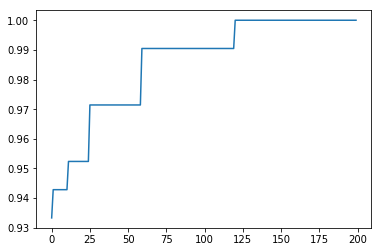

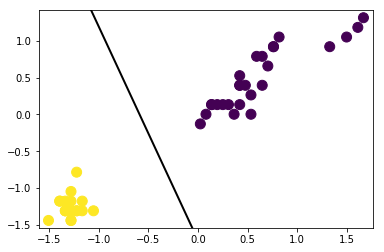

In [10]:
plt.plot(range(len(acc_1)),acc_1)
plt.show()
plot_x = np.array([np.min(x_test_1['petal_length'][:]), np.max(x_test_1['petal_width'][:])])
plot_y = 1 / W_1[1] * (-W_1[0] * plot_x - b_1)
plt.scatter(x_test_1['petal_length'][:], x_test_1['petal_width'][:], c=np.squeeze(y_test_1), s=100, cmap='viridis')
plt.plot(plot_x, plot_y, color='k', linewidth=2)
plt.xlim([np.min(x_test_1['petal_length'][:]) - 0.1,np.max(x_test_1['petal_length'][:]) + 0.1]);
plt.ylim([np.min(x_test_1['petal_width'][:]) - 0.1,np.max(x_test_1['petal_width'][:]) + 0.1]);
plt.show()

The setosa can be separated linearly with other two species, or in other words the setosa is totally different with other
two species in some way.

<h1>Part b:</h1>

In [11]:
x_2,y_2 = data_preprocessing(dataset,2,flower='Iris-virginica')
#generate traning and validation sets
x_train_2, x_test_2, y_train_2, y_test_2 = train_test_split(x_2,y_2,test_size=0.3)

Index(['petal_length', 'petal_width'], dtype='object')
species


<h2>Define hyper-parameter</h2>

In [12]:
lr = 0.01
num_steps = 200
#n_hidden_1 = 64
#n_hidden_2 = 32
num_input = 105
test_num = 45

<h2>Define Placeholder and Variables</h2>

In [13]:
tf.reset_default_graph()
tf.reset_default_graph()
X = tf.placeholder(tf.float32,shape=[num_input,2],name='X')
Y = tf.placeholder(tf.float32,shape=[num_input,1],name='Y')
A = tf.placeholder(tf.float32,shape=[test_num,2],name='A')
B = tf.placeholder(tf.float32,shape=[test_num,1],name='B')
W = tf.Variable(tf.random_normal([2,1]),tf.float32,name='W')
#define the bias with zero initialization
b = tf.Variable(tf.zeros([1,1]),tf.float32,name='b')

<h2>Define update rule and accuracy</h2>

In [14]:
Y_hat = tf.sigmoid(tf.add(tf.matmul(X,W),b))
B_hat = tf.sigmoid(tf.add(tf.matmul(A,W),b))
loss = tf.reduce_mean(tf.square(Y-Y_hat))
optimizer = tf.train.AdamOptimizer(learning_rate = lr)
train_op = optimizer.minimize(loss)
#dW = tf.matmul(tf.transpose(X),loss)
#db = tf.reduce_sum(loss,0)
#W_ = W + lr*dW
#b_ = b + lr*db
correct_pred = tf.equal(tf.round(Y_hat),Y)
correct_prediction = tf.equal(tf.round(B_hat),B)
accuracy = tf.reduce_mean(tf.cast(correct_pred,tf.float32))
accur = tf.reduce_mean(tf.cast(correct_prediction,tf.float32))
#group two operations together
#step = tf.group(W.assign(W_), b.assign(b_))

<h2>Execute training</h2>

In [15]:
init = tf.global_variables_initializer()
acc_2 = np.zeros(num_steps)
with tf.Session() as sess:
    #run initialization
    sess.run(init)
    #training for number of iterations
    for i in range(num_steps):
        #every iteration we run optimization on the training data X and labels Y
        sess.run(train_op,feed_dict = {X:x_train_2,Y:y_train_2})
        acc_2[i] = sess.run(accuracy, feed_dict = {X:x_train_2,Y:y_train_2})
        if i % 10 == 0:
            cost = sess.run(loss, feed_dict = {X:x_train_2,Y:y_train_2})
            
            print("step "+str(i)+", cost= {:.3f}".format(cost))
            print("step "+str(i)+", Accuracy= {:.9f}".format(acc_2[i]))
    #after training, we acquire the weight and bias
    #np.squeeze plays a role to get rid of the redundant dimension [i.e.make (2,1) be (2,)]

    print("Test Accuracy:" + str(sess.run(accur, feed_dict = {A:x_test_2,B:y_test_2})))
    W_2 = np.squeeze(sess.run(W))
    b_2 = np.squeeze(sess.run(b))

step 0, cost= 0.157
step 0, Accuracy= 0.666666687
step 10, cost= 0.146
step 10, Accuracy= 0.704761922
step 20, cost= 0.135
step 20, Accuracy= 0.742857158
step 30, cost= 0.126
step 30, Accuracy= 0.771428585
step 40, cost= 0.117
step 40, Accuracy= 0.819047630
step 50, cost= 0.110
step 50, Accuracy= 0.847619057
step 60, cost= 0.103
step 60, Accuracy= 0.857142866
step 70, cost= 0.097
step 70, Accuracy= 0.885714293
step 80, cost= 0.092
step 80, Accuracy= 0.895238101
step 90, cost= 0.088
step 90, Accuracy= 0.933333337
step 100, cost= 0.084
step 100, Accuracy= 0.952380955
step 110, cost= 0.080
step 110, Accuracy= 0.952380955
step 120, cost= 0.077
step 120, Accuracy= 0.961904764
step 130, cost= 0.074
step 130, Accuracy= 0.952380955
step 140, cost= 0.071
step 140, Accuracy= 0.952380955
step 150, cost= 0.069
step 150, Accuracy= 0.961904764
step 160, cost= 0.066
step 160, Accuracy= 0.961904764
step 170, cost= 0.064
step 170, Accuracy= 0.961904764
step 180, cost= 0.062
step 180, Accuracy= 0.961904

<h2>Plot</h2>

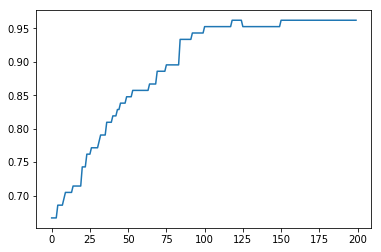

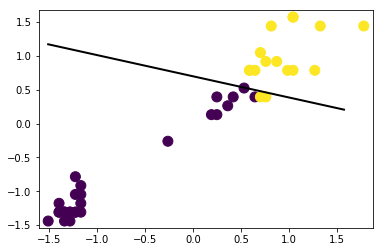

In [16]:
plt.plot(range(len(acc_2)),acc_2)
plt.show()
plot_x = np.array([np.min(x_test_2['petal_length'][:]), np.max(x_test_2['petal_width'][:])])
plot_y = 1 / W_2[1] * (-W_2[0] * plot_x - b_2)
plt.scatter(x_test_2['petal_length'][:], x_test_2['petal_width'][:], c=np.squeeze(y_test_2), s=100, cmap='viridis')
plt.plot(plot_x, plot_y, color='k', linewidth=2)
plt.xlim([np.min(x_test_2['petal_length'][:]) - 0.1,np.max(x_test_2['petal_length'][:]) + 0.1]);
plt.ylim([np.min(x_test_2['petal_width'][:]) - 0.1,np.max(x_test_2['petal_width'][:]) + 0.1]);
plt.show()

The virginica cannot be separated linearly with the width and length of petal. In other words, we can not distinguish virginica 
with only the width and length of petal.

<h1>Part c:</h1>

In [17]:
x_3,y_3 = data_preprocessing(dataset,4)
#generate traning and validation sets
x_train_3, x_test_3, y_train_3, y_test_3 = train_test_split(x_3,y_3,test_size=0.3)

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width'], dtype='object')
species


<h2>Define hyper-parameters</h2>

In [18]:
#learning rate
lr = 0.01
#number of traning steps
num_steps = 200

#network parameters
n_hidden_1 = 256
n_hidden_2 = 128
num_input = 105
test_num = 45
num_classes = 3

<h2>Define placehoder and variables</h2>

In [19]:
tf.reset_default_graph()

X = tf.placeholder(tf.float32,shape=[None,4],name='X')
Y = tf.placeholder(tf.float32,shape=[None,num_classes],name='Y')

weights = {
    'W1': tf.Variable(tf.random_normal([4, n_hidden_1]),name='W1'),
    'W2': tf.Variable(tf.random_normal([n_hidden_1, n_hidden_2]),name='W2'),
    'Wout': tf.Variable(tf.random_normal([n_hidden_2, num_classes]),name='Wout')
}

biases = {
    'b1': tf.Variable(tf.zeros(shape=[n_hidden_1]),name='b1'),
    'b2': tf.Variable(tf.zeros(shape=[n_hidden_2]),name='b2'),
    'bout': tf.Variable(tf.zeros(shape=[num_classes]),name='bout')
}

<h2>Define the neural network</h2>

In [20]:
def neural_net(x):
    layer_1_out = tf.add(tf.matmul(x,weights['W1']),biases['b1'])
    layer_1_out = tf.nn.relu(layer_1_out)
    layer_2_out = tf.add(tf.matmul(layer_1_out,weights['W2']),biases['b2'])
    layer_2_out = tf.nn.relu(layer_2_out)
    out = tf.add(tf.matmul(layer_2_out,weights['Wout']),biases['bout'])
    return out


<h2>Define cost function and accuracy</h2>

In [21]:
logits = neural_net(X)

#define loss
loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=logits,labels=Y),name='loss')
#define optimizer
optimizer = tf.train.GradientDescentOptimizer(learning_rate=lr)
train_op = optimizer.minimize(loss)

#compare the predicted labels with true labels
correct_pred = tf.equal(tf.argmax(logits,1),tf.argmax(Y,1))

#compute the accuracy by taking average
accuracy = tf.reduce_mean(tf.cast(correct_pred,tf.float32),name='accuracy')

#Initialize the variables
init = tf.global_variables_initializer()



<h2>Execute training</h2>

In [22]:
acc_3 = np.zeros(num_steps)
with tf.Session() as sess:
    #run initialization
    sess.run(init)
    #training for number of iterations
    for i in range(num_steps):
        #every iteration we run optimization on the training data X and labels Y
        sess.run(train_op,feed_dict = {X:x_train_3,Y:y_train_3})
        acc_3[i] = sess.run(accuracy, feed_dict = {X:x_train_3,Y:y_train_3})
        if i % 10 == 0:
            cost = sess.run(loss, feed_dict = {X:x_train_3,Y:y_train_3})
            
            print("step "+str(i)+", cost= {:.3f}".format(cost))
            print("step "+str(i)+", Accuracy= {:.9f}".format(acc_3[i]))
    #after training, we acquire the weight and bias
    #np.squeeze plays a role to get rid of the redundant dimension [i.e.make (2,1) be (2,)]

    print("Test Accuracy:" + str(sess.run(accuracy, feed_dict = {X:x_test_3,Y:y_test_3})))

step 0, cost= 8.855
step 0, Accuracy= 0.704761922
step 10, cost= 0.824
step 10, Accuracy= 0.961904764
step 20, cost= 0.191
step 20, Accuracy= 0.980952382
step 30, cost= 0.000
step 30, Accuracy= 1.000000000
step 40, cost= 0.000
step 40, Accuracy= 1.000000000
step 50, cost= 0.000
step 50, Accuracy= 1.000000000
step 60, cost= 0.000
step 60, Accuracy= 1.000000000
step 70, cost= 0.000
step 70, Accuracy= 1.000000000
step 80, cost= 0.000
step 80, Accuracy= 1.000000000
step 90, cost= 0.000
step 90, Accuracy= 1.000000000
step 100, cost= 0.000
step 100, Accuracy= 1.000000000
step 110, cost= 0.000
step 110, Accuracy= 1.000000000
step 120, cost= 0.000
step 120, Accuracy= 1.000000000
step 130, cost= 0.000
step 130, Accuracy= 1.000000000
step 140, cost= 0.000
step 140, Accuracy= 1.000000000
step 150, cost= 0.000
step 150, Accuracy= 1.000000000
step 160, cost= 0.000
step 160, Accuracy= 1.000000000
step 170, cost= 0.000
step 170, Accuracy= 1.000000000
step 180, cost= 0.000
step 180, Accuracy= 1.000000

<h2>Plot</h2>

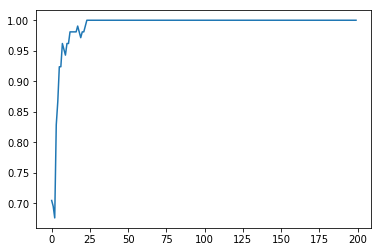

In [23]:
plt.plot(range(len(acc_3)),acc_3)
plt.show()